## Import method yang diperlukan

In [1]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer
import matplotlib.cm as cm
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering

from sklearn.decomposition import PCA

## Pre Processing Data

In [2]:
df = pd.read_csv('final_dataset.csv')
df.head()

,GameID,PlayerName,TeamAbbreviation,Agent,ACS,Kills,Deaths,Assists,PlusMinus,ADR,...,Patch,EventID,EventName,EventStage,Team1ID_y,Team2ID_y,Team1_y,Team2_y,Team1_MapScore,Team2_MapScore
0,60894,Reduxx,Boos,jett,313.0,24.0,10.0,3.0,14.0,195.0,...,3.0,826,Nerd Street Gamers Winter Championship - Regio...,Group Stage: Decider (A),6903,6020,Booster Seat Gaming,Pho Real,2,1
1,60894,ChurmZ,Boos,chamber,227.0,16.0,10.0,7.0,6.0,161.0,...,3.0,826,Nerd Street Gamers Winter Championship - Regio...,Group Stage: Decider (A),6903,6020,Booster Seat Gaming,Pho Real,2,1
2,60894,diaamond,Boos,sova,226.0,17.0,9.0,8.0,8.0,148.0,...,3.0,826,Nerd Street Gamers Winter Championship - Regio...,Group Stage: Decider (A),6903,6020,Booster Seat Gaming,Pho Real,2,1
3,60894,Boltzy,Boos,viper,218.0,17.0,12.0,2.0,5.0,141.0,...,3.0,826,Nerd Street Gamers Winter Championship - Regio...,Group Stage: Decider (A),6903,6020,Booster Seat Gaming,Pho Real,2,1
4,60894,Virtyy,Boos,skye,80.0,5.0,13.0,3.0,-8.0,55.0,...,3.0,826,Nerd Street Gamers Winter Championship - Regio...,Group Stage: Decider (A),6903,6020,Booster Seat Gaming,Pho Real,2,1


In [3]:
# Lihat seluruh kolom, analisis yang tidak diperlukan
print(list(df.columns.values))

['GameID', 'PlayerName', 'TeamAbbreviation', 'Agent', 'ACS', 'Kills', 'Deaths', 'Assists', 'PlusMinus', 'ADR', 'HS_Percent', 'FirstKills', 'FirstDeaths', 'FKFD_PlusMinus', 'Num_2Ks', 'Num_3Ks', 'Num_4Ks', 'Num_5Ks', 'OnevOne', 'OnevTwo', 'OnevThree', 'OnevFour', 'OnevFive', 'Econ', 'Plants', 'Defuses', 'MatchID', 'Map', 'Team1ID_x', 'Team2ID_x', 'Team1_x', 'Team2_x', 'Winner', 'Team1_Eco', 'Team1_SemiEco', 'Team1_SemiBuy', 'Team1_FullBuy', 'Team1_TotalRounds', 'Team2_Eco', 'Team2_SemiEco', 'Team2_SemiBuy', 'Team2_FullBuy', 'Team2_TotalRounds', 'Date', 'Patch', 'EventID', 'EventName', 'EventStage', 'Team1ID_y', 'Team2ID_y', 'Team1_y', 'Team2_y', 'Team1_MapScore', 'Team2_MapScore']


In [4]:
# Buang beberapa kolom yang ditidak diperlukan
df = df.drop(['GameID', 'PlayerName', 'TeamAbbreviation', 'MatchID', 'Team1ID_x', 'Team2ID_x',
              'Team1_x', 'Team2_x', 'Winner', 'EventID', 'EventName', 'EventStage',
              'Team1ID_y', 'Team2ID_y', 'Team1_y', 'Team2_y'], axis=1)

df

,Agent,ACS,Kills,Deaths,Assists,PlusMinus,ADR,HS_Percent,FirstKills,FirstDeaths,...,Team1_TotalRounds,Team2_Eco,Team2_SemiEco,Team2_SemiBuy,Team2_FullBuy,Team2_TotalRounds,Date,Patch,Team1_MapScore,Team2_MapScore
0,jett,313.0,24.0,10.0,3.0,14.0,195.0,31.0,4.0,4.0,...,13,4.0,2.0,4.0,10.0,7,2022-01-08 15:30:00,3.0,2,1
1,chamber,227.0,16.0,10.0,7.0,6.0,161.0,16.0,1.0,1.0,...,13,4.0,2.0,4.0,10.0,7,2022-01-08 15:30:00,3.0,2,1
2,sova,226.0,17.0,9.0,8.0,8.0,148.0,27.0,3.0,0.0,...,13,4.0,2.0,4.0,10.0,7,2022-01-08 15:30:00,3.0,2,1
3,viper,218.0,17.0,12.0,2.0,5.0,141.0,19.0,3.0,0.0,...,13,4.0,2.0,4.0,10.0,7,2022-01-08 15:30:00,3.0,2,1
4,skye,80.0,5.0,13.0,3.0,-8.0,55.0,22.0,3.0,1.0,...,13,4.0,2.0,4.0,10.0,7,2022-01-08 15:30:00,3.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108245,omen,227.0,13.0,12.0,1.0,1.0,124.0,18.0,1.0,0.0,...,13,3.0,3.0,5.0,4.0,2,2020-07-31 14:00:00,1.0,1,0
108246,phoenix,110.0,4.0,13.0,4.0,-9.0,84.0,33.0,0.0,2.0,...,13,3.0,3.0,5.0,4.0,2,2020-07-31 14:00:00,1.0,1,0
108247,jett,98.0,4.0,15.0,0.0,-11.0,56.0,13.0,1.0,7.0,...,13,3.0,3.0,5.0,4.0,2,2020-07-31 14:00:00,1.0,1,0
108248,sova,91.0,3.0,14.0,4.0,-11.0,64.0,19.0,0.0,1.0,...,13,3.0,3.0,5.0,4.0,2,2020-07-31 14:00:00,1.0,1,0


In [5]:
# Cek jenis data ditiap kolom
df.dtypes

Agent                 object
ACS                  float64
Kills                float64
Deaths               float64
Assists              float64
PlusMinus            float64
ADR                  float64
HS_Percent           float64
FirstKills           float64
FirstDeaths          float64
FKFD_PlusMinus       float64
Num_2Ks              float64
Num_3Ks              float64
Num_4Ks              float64
Num_5Ks              float64
OnevOne              float64
OnevTwo              float64
OnevThree            float64
OnevFour             float64
OnevFive             float64
Econ                 float64
Plants               float64
Defuses              float64
Map                   object
Team1_Eco            float64
Team1_SemiEco        float64
Team1_SemiBuy        float64
Team1_FullBuy        float64
Team1_TotalRounds      int64
Team2_Eco            float64
Team2_SemiEco        float64
Team2_SemiBuy        float64
Team2_FullBuy        float64
Team2_TotalRounds      int64
Date          

In [6]:
# Cek data yang tipenya objek
df[['Agent', 'Map', 'Date']]

,Agent,Map,Date
0,jett,Breeze,2022-01-08 15:30:00
1,chamber,Breeze,2022-01-08 15:30:00
2,sova,Breeze,2022-01-08 15:30:00
3,viper,Breeze,2022-01-08 15:30:00
4,skye,Breeze,2022-01-08 15:30:00
...,...,...,...
108245,omen,Bind,2020-07-31 14:00:00
108246,phoenix,Bind,2020-07-31 14:00:00
108247,jett,Bind,2020-07-31 14:00:00
108248,sova,Bind,2020-07-31 14:00:00


In [7]:
# Jumlah nilai unik
print("Agent:", df['Agent'].nunique())
print("Map:", df['Map'].nunique())
print("Date", df['Date'].nunique())

Agent: 17
Map: 7
Date 3520


In [8]:
# Perbaiki nilai date sehingga hanya diambil jam-nya saja
df['Date_Note'] = df['Date'].str.replace(':', '.')
df['Date_Note'] = df['Date_Note'].str[11:15]
df['Date_Note'] = df['Date_Note'].astype(float)

conditions = [
    (0 <= df['Date_Note']) & (df['Date_Note'] < 6),
    (6 <= df['Date_Note']) & (df['Date_Note'] < 12),
    (12 <= df['Date_Note']) & (df['Date_Note'] < 18),
    (18 <= df['Date_Note']) & (df['Date_Note'] <= 24)
    ]

values = ['Night', 'Morning', 'Afternoon', 'Evening']

df['Note'] = np.select(conditions, values)

df.head()

,Agent,ACS,Kills,Deaths,Assists,PlusMinus,ADR,HS_Percent,FirstKills,FirstDeaths,...,Team2_SemiEco,Team2_SemiBuy,Team2_FullBuy,Team2_TotalRounds,Date,Patch,Team1_MapScore,Team2_MapScore,Date_Note,Note
0,jett,313.0,24.0,10.0,3.0,14.0,195.0,31.0,4.0,4.0,...,2.0,4.0,10.0,7,2022-01-08 15:30:00,3.0,2,1,15.3,Afternoon
1,chamber,227.0,16.0,10.0,7.0,6.0,161.0,16.0,1.0,1.0,...,2.0,4.0,10.0,7,2022-01-08 15:30:00,3.0,2,1,15.3,Afternoon
2,sova,226.0,17.0,9.0,8.0,8.0,148.0,27.0,3.0,0.0,...,2.0,4.0,10.0,7,2022-01-08 15:30:00,3.0,2,1,15.3,Afternoon
3,viper,218.0,17.0,12.0,2.0,5.0,141.0,19.0,3.0,0.0,...,2.0,4.0,10.0,7,2022-01-08 15:30:00,3.0,2,1,15.3,Afternoon
4,skye,80.0,5.0,13.0,3.0,-8.0,55.0,22.0,3.0,1.0,...,2.0,4.0,10.0,7,2022-01-08 15:30:00,3.0,2,1,15.3,Afternoon


In [9]:
# Drop yang tidak perlu
df = df.drop(['Date_Note', 'Date'], axis=1)
df.head()

,Agent,ACS,Kills,Deaths,Assists,PlusMinus,ADR,HS_Percent,FirstKills,FirstDeaths,...,Team1_TotalRounds,Team2_Eco,Team2_SemiEco,Team2_SemiBuy,Team2_FullBuy,Team2_TotalRounds,Patch,Team1_MapScore,Team2_MapScore,Note
0,jett,313.0,24.0,10.0,3.0,14.0,195.0,31.0,4.0,4.0,...,13,4.0,2.0,4.0,10.0,7,3.0,2,1,Afternoon
1,chamber,227.0,16.0,10.0,7.0,6.0,161.0,16.0,1.0,1.0,...,13,4.0,2.0,4.0,10.0,7,3.0,2,1,Afternoon
2,sova,226.0,17.0,9.0,8.0,8.0,148.0,27.0,3.0,0.0,...,13,4.0,2.0,4.0,10.0,7,3.0,2,1,Afternoon
3,viper,218.0,17.0,12.0,2.0,5.0,141.0,19.0,3.0,0.0,...,13,4.0,2.0,4.0,10.0,7,3.0,2,1,Afternoon
4,skye,80.0,5.0,13.0,3.0,-8.0,55.0,22.0,3.0,1.0,...,13,4.0,2.0,4.0,10.0,7,3.0,2,1,Afternoon


In [10]:
df.dtypes

Agent                 object
ACS                  float64
Kills                float64
Deaths               float64
Assists              float64
PlusMinus            float64
ADR                  float64
HS_Percent           float64
FirstKills           float64
FirstDeaths          float64
FKFD_PlusMinus       float64
Num_2Ks              float64
Num_3Ks              float64
Num_4Ks              float64
Num_5Ks              float64
OnevOne              float64
OnevTwo              float64
OnevThree            float64
OnevFour             float64
OnevFive             float64
Econ                 float64
Plants               float64
Defuses              float64
Map                   object
Team1_Eco            float64
Team1_SemiEco        float64
Team1_SemiBuy        float64
Team1_FullBuy        float64
Team1_TotalRounds      int64
Team2_Eco            float64
Team2_SemiEco        float64
Team2_SemiBuy        float64
Team2_FullBuy        float64
Team2_TotalRounds      int64
Patch         

## Pre Processing Data (One Hot Encoding)

In [11]:
# One Hot Encoding untuk Agent, Map, Note
df_encoded = pd.get_dummies(df, columns=['Note', 'Agent', 'Map',])
df_encoded

,ACS,Kills,Deaths,Assists,PlusMinus,ADR,HS_Percent,FirstKills,FirstDeaths,FKFD_PlusMinus,...,Agent_sova,Agent_viper,Agent_yoru,Map_Ascent,Map_Bind,Map_Breeze,Map_Fracture,Map_Haven,Map_Icebox,Map_Split
0,313.0,24.0,10.0,3.0,14.0,195.0,31.0,4.0,4.0,0.0,...,0,0,0,0,0,1,0,0,0,0
1,227.0,16.0,10.0,7.0,6.0,161.0,16.0,1.0,1.0,0.0,...,0,0,0,0,0,1,0,0,0,0
2,226.0,17.0,9.0,8.0,8.0,148.0,27.0,3.0,0.0,3.0,...,1,0,0,0,0,1,0,0,0,0
3,218.0,17.0,12.0,2.0,5.0,141.0,19.0,3.0,0.0,3.0,...,0,1,0,0,0,1,0,0,0,0
4,80.0,5.0,13.0,3.0,-8.0,55.0,22.0,3.0,1.0,2.0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108245,227.0,13.0,12.0,1.0,1.0,124.0,18.0,1.0,0.0,1.0,...,0,0,0,0,1,0,0,0,0,0
108246,110.0,4.0,13.0,4.0,-9.0,84.0,33.0,0.0,2.0,-2.0,...,0,0,0,0,1,0,0,0,0,0
108247,98.0,4.0,15.0,0.0,-11.0,56.0,13.0,1.0,7.0,-6.0,...,0,0,0,0,1,0,0,0,0,0
108248,91.0,3.0,14.0,4.0,-11.0,64.0,19.0,0.0,1.0,-1.0,...,1,0,0,0,1,0,0,0,0,0


In [12]:
# Simpan ke csv agar mudah digunakan
df_encoded.to_csv('dataset_encoded_one_hot.csv', index=False)

In [12]:
# Cek jenis data ditiap kolom
print(list(df_encoded.dtypes))

[dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('int64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('int64'), dtype('float64'), dtype('int64'), dtype('int64'), dtype('uint8'), dtype('uint8'), dtype('uint8'), dtype('uint8'), dtype('uint8'), dtype('uint8'), dtype('uint8'), dtype('uint8'), dtype('uint8'), dtype('uint8'), dtype('uint8'), dtype('uint8'), dtype('uint8'), dtype('uint8'), dtype('uint8'), dtype('uint8'), dtype('uint8'), dtype('uint8'), dtype('uint8'), dtype('uint8'), dtype('uint8'), dtype('uint8'), dtype('uint8'), dtype('ui

## Pre Processing Data (Standarisasi)

In [13]:
# Lihat seluruh fitur
print(list(df_encoded.columns.values))

['ACS', 'Kills', 'Deaths', 'Assists', 'PlusMinus', 'ADR', 'HS_Percent', 'FirstKills', 'FirstDeaths', 'FKFD_PlusMinus', 'Num_2Ks', 'Num_3Ks', 'Num_4Ks', 'Num_5Ks', 'OnevOne', 'OnevTwo', 'OnevThree', 'OnevFour', 'OnevFive', 'Econ', 'Plants', 'Defuses', 'Team1_Eco', 'Team1_SemiEco', 'Team1_SemiBuy', 'Team1_FullBuy', 'Team1_TotalRounds', 'Team2_Eco', 'Team2_SemiEco', 'Team2_SemiBuy', 'Team2_FullBuy', 'Team2_TotalRounds', 'Patch', 'Team1_MapScore', 'Team2_MapScore', 'Note_Afternoon', 'Note_Evening', 'Note_Morning', 'Note_Night', 'Agent_astra', 'Agent_breach', 'Agent_brimstone', 'Agent_chamber', 'Agent_cypher', 'Agent_jett', 'Agent_kayo', 'Agent_killjoy', 'Agent_omen', 'Agent_phoenix', 'Agent_raze', 'Agent_reyna', 'Agent_sage', 'Agent_skye', 'Agent_sova', 'Agent_viper', 'Agent_yoru', 'Map_Ascent', 'Map_Bind', 'Map_Breeze', 'Map_Fracture', 'Map_Haven', 'Map_Icebox', 'Map_Split']


In [14]:
# Standarisasi semua fitur kecuali yang fitur hasil one hot encoding
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
column = []

for i in list(df_encoded.columns.values):
  if "Note_" not in i and "Agent_" not in i and "Map_" not in i:
    column.append(i)

df_encoded[column] = scaler.fit_transform(df_encoded[column])
df_encoded.head()

,ACS,Kills,Deaths,Assists,PlusMinus,ADR,HS_Percent,FirstKills,FirstDeaths,FKFD_PlusMinus,...,Agent_sova,Agent_viper,Agent_yoru,Map_Ascent,Map_Bind,Map_Breeze,Map_Fracture,Map_Haven,Map_Icebox,Map_Split
0,1.773328,1.724370,-1.180433,-0.717402,2.228358,1.628564,0.829956,1.111593,1.201549,0.000000,...,0,0,0,0,0,1,0,0,0,0
1,0.390898,0.265535,-1.180433,0.573506,0.956092,0.767288,-0.831812,-0.606890,-0.656004,0.000000,...,0,0,0,0,0,1,0,0,0,0
2,0.374824,0.447889,-1.439541,0.896233,1.274159,0.437977,0.386818,0.538765,-1.275188,1.405793,...,1,0,0,0,0,1,0,0,0,0
3,0.246225,0.447889,-0.662216,-1.040129,0.797059,0.260656,-0.499458,0.538765,-1.275188,1.405793,...,0,1,0,0,0,1,0,0,0,0
4,-1.972092,-1.740364,-0.403108,-0.717402,-1.270374,-1.917865,-0.167105,0.538765,-0.656004,0.937195,...,0,0,0,0,0,1,0,0,0,0


In [ ]:
# Simpan ke csv agar mudah digunakan
df_encoded.to_csv('dataset_encoded_standarization.csv', index=False)

## Selected Feature

In [15]:
selected_feature = df_encoded[['ACS', 'Kills', 'Deaths', 'Assists', 'ADR', 'HS_Percent', 'Econ', 'Plants', 'Defuses', 'Patch',
          'Note_Evening', 'Note_Morning', 'Note_Night']]

## Elbow Method (K Means)

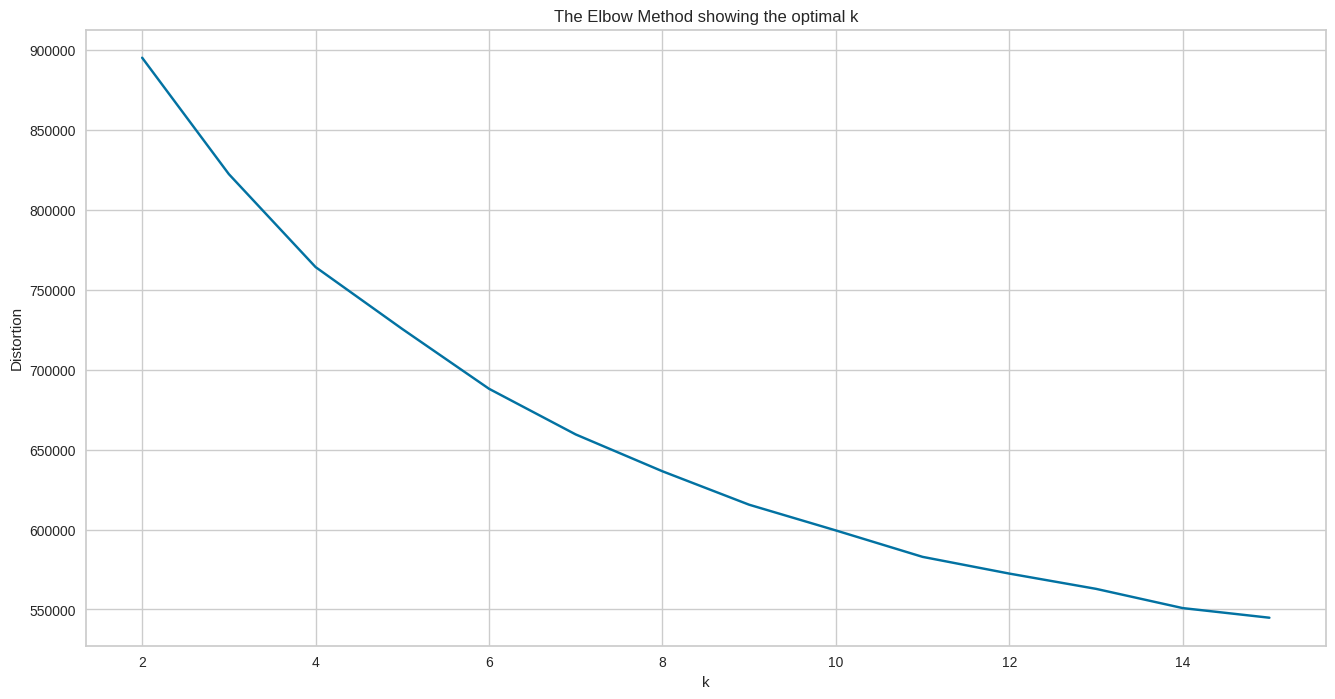

In [35]:
distortions = []
K = range(2,16)
for k in K:
  kmeanModel = KMeans(n_clusters=k, n_init='auto')
  kmeanModel.fit(selected_feature)
  distortions.append(kmeanModel.inertia_)

plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

## Silhouette Score (K Means)

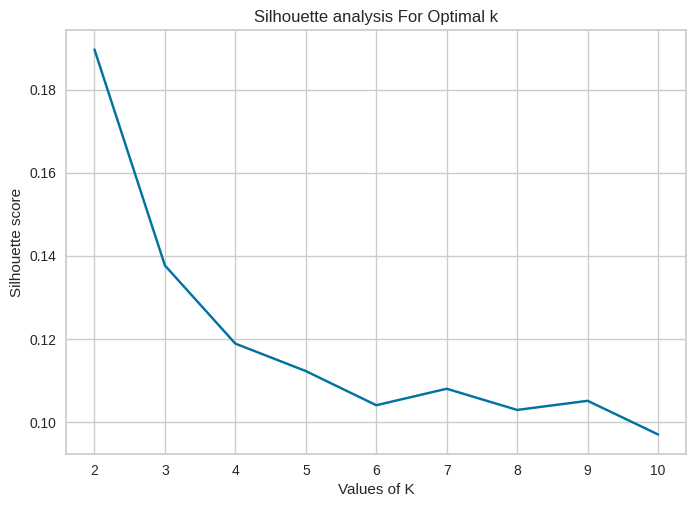

In [32]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]
silhouette_avg = []
for num_clusters in range_n_clusters:
  # initialise kmeans
  kmeans = KMeans(n_clusters=num_clusters, n_init='auto')
  kmeans.fit(selected_feature)
  cluster_labels = kmeans.labels_

  # silhouette score
  silhouette_avg.append(silhouette_score(selected_feature, cluster_labels))

plt.plot(range_n_clusters,silhouette_avg,'bx-')
plt.xlabel('Values of K')
plt.ylabel('Silhouette score')
plt.title('Silhouette analysis For Optimal k')
plt.show()

## Prediksi Cluster dengan n = 6 (K Means)

In [16]:
pca = PCA(n_components = 3)
pca.fit(selected_feature)
data_pca = pca.transform(selected_feature)
data_pca = pd.DataFrame(data_pca,columns=['PC1','PC2','PC3'])
data_pca.head()

,PC1,PC2,PC3
0,3.226483,-1.604626,0.060845
1,1.079540,0.032547,1.007742
2,0.926045,0.281683,1.624101
3,0.267384,-1.408195,-0.263895
4,-3.633494,-1.382666,0.349682


In [18]:
model = KMeans(n_clusters=6,  n_init='auto')

cluster_assignment = model.fit_predict(data_pca)
data_with_clusters = pd.DataFrame(data_pca.copy())
data_with_clusters['Clusters'] = cluster_assignment
data_with_clusters

,PC1,PC2,PC3,Clusters
0,3.226483,-1.604626,0.060845,0
1,1.079540,0.032547,1.007742,5
2,0.926045,0.281683,1.624101,3
3,0.267384,-1.408195,-0.263895,5
4,-3.633494,-1.382666,0.349682,4
...,...,...,...,...
108245,0.056065,-1.534966,-0.382025,5
108246,-2.418178,-0.374784,0.813575,4
108247,-3.827908,-1.400675,-0.715410,4
108248,-3.496767,-0.547963,0.165032,4


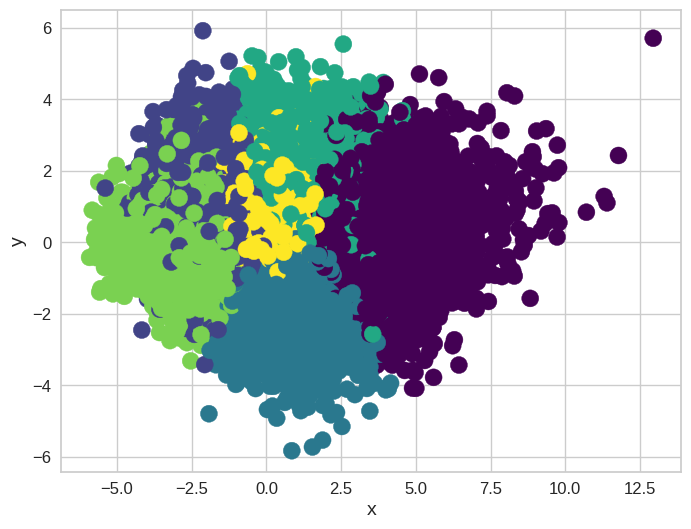

In [24]:
# TODO: Tunjukkan plot berdasarkan hasil clustering yang sudah dilakukan.
from matplotlib.colors import ListedColormap

fig, ax = plt.subplots(figsize=(8, 6))
plt.scatter(x=data_with_clusters['PC1'], y=data_with_clusters['PC3'], s=150,
            c=data_with_clusters['Clusters'].astype('category'),
            cmap='viridis')
ax.set_xlabel(r'x', fontsize=14)
ax.set_ylabel(r'y', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

## Uji Coba

In [ ]:
pca = PCA(n_components = 3)
pca.fit(df_encoded)
data_pca = pca.transform(df_encoded)
data_pca = pd.DataFrame(data_pca,columns=['PC1','PC2','PC3'])
data_pca.head()